In Jupyter Notebooks, My code with the outputs that were compiled by me are already present. it can be seen under every cell of code.
# shortcuts keys in juptyer notebook (Windows keys)
'ctrl' + 'Enter' for executing one particular cell of code

# Required packages and libraries
#### pandas 
for creation and working with python's version of dataframes ( dataframes are just like excel spreadsheets, each cell can have different data type and works in rows and columns)
#### numpy 
is for creation of arrays.
#### matplotlib
is for data visualization
#### keras
is artificial intelligence and machine learning package.
'sequential' is the ANN model folder imported.
'Dense' is for initialising hidden layers in aritifical neural networks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

C:\Users\panne\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Breast cancer data cleaning
Here dataset from website 'kaggle' is downloaded,fetched as variable and done some cleaning.

1.Ending column 'unnamed' is dropped as it doesn't add meaning to data exploration.

2.convert categorical and string columns to proper numerical columns.

3.proper labelling of columns.

4.checking out for NA's,empty or irrelevant values in dataset.

In [57]:
data = pd.read_csv('C:/Users/panne/Desktop/thesis_dataset.csv') #using pandas method read_csv for reading comma sepearated values into a variable
data.head() #to just view the top rows, for basic idea over dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.tail() # to view the ending rows 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
data.shape #shows the rows and column counts  of dataset.

(569, 33)

In [58]:
#omitting the last column with data
data = data.drop(['Unnamed: 32'],axis = 1) # dropping last column which is of index 32
data.shape # to see if i dropped the last column properly

(569, 32)

In [59]:
# all column names extraction
heading = data.columns.values
heading #contains all heading for backup if something goes wrong while creating dataframe

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [8]:
data.describe() # basic exploration that shows mean,quadrants, min and max values. great ptyhon's method while working with numerical datasets.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data_id = pd.to_numeric(data.iloc[:,0]) # conversion of some columns to proper integer.
# This is done when columns may seem with numerical data but are in strings.
data_diag = data.iloc[:,1]
data_all = data.iloc[:,2:].apply(pd.to_numeric)
data_ann = pd.DataFrame(data_id) # creation of dataframe after conversion to numerics
data_ann = data_ann.join(data_diag) # joining the other variables to the 'data_ann' dataframe using pandas's method.
data_ann = data_ann.join(data_all)
data_ann.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data_ann.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [11]:
# ANN preparation
# dataset comes with value 'B' for benign and 'M' for malignant breast cancer in 'Diagnosis column'.
# ANN model wont understand so whole dataset has to converted from strings and categorical to numerical dataset completely for easier fitting.
# Diagnosis column after this loop converts - 0 for benign and 1 for malignant cancer.

# iloc is method used for slicing,stripping values from indexes in pandas dataframes.
# here X contains the independent variable values.
# Y contains dependent variable values.
X = data_ann.iloc[:,2:]
Y = data_ann.iloc[:,1]
for i in range(len(Y)):
    if Y[i] == 'B':
        Y[i] = 0
    else:
        Y[i] = 1

C:\Users\panne\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\panne\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [12]:
# removal of null,NA's values columnwise
data_ann.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
#STATISTICS
# stats methods are used to see which columns of dataset really contribute towards prediction. helps in omitting irrelevant columns before prediction. One of the factor for increasing accuracy scores during predicting with models.
#checking the most correlated values between each columns.
# correlation is for seeing variables affecting each other. for example: how related is radius_mean of breast to concavity_mean. 
data_ann.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


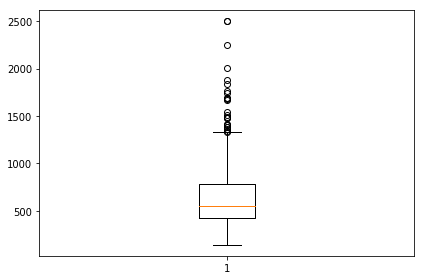

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

In [14]:
lim_label = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
# checking for outliers
plt.boxplot(data_ann.loc[:,lim_label[3]])
plt.tight_layout()
plt.show()
data_ann.loc[:,'texture_mean'].describe()


In [16]:
Y.tail() #checking if values from 'B' have been properly converted to '0'.

564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: object

In [17]:
Y.shape

(569,)

In [15]:
X.shape #checking loss of data.

(569, 30)

In [20]:
#splitting data into testing and trainng by percentage
# splitted into 90% data for training since its a small dataset and 10% for testing.
# x_train contains training independent data
# x_test contains testing independent data which will be input after model has been trained.
# y_train contains benign,malignant status for training.(dependent variable)
# y_test contains B,M data but wont act as input after model trained.

x_train = X.iloc[:round(len(X)*0.9),:]
y_train = Y.iloc[:round(len(X)*0.9)]
x_test = X.iloc[round(len(X)*0.9):,:]
y_test = Y.iloc[round(len(X)*0.9):]

In [21]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: object

In [22]:
y_test.shape

(57,)

# ANN model creation and initialization.
'Sequential' folder contains ann model in keras package.

'add' method to initialize a hidden layer and 'hidden' method for creation of hidden layer with number of neurons required with activation units.

Activation unit is used for every neuron. 3-4 inputs are calculated to create one normalised value that lies between 0 to 1.
Rectified linear unit 'relu' normalises inputs into -1 to +1 band whereas sigmoid normalises between 0 to 1.

totally 4 hidden layers are used here -

first layer with 24 neurons and the input dim means 30 columns are acting as input for training the breast cancer ANN model.
Number of neurons should be less than the number of input columns.
second layer with 12 neurons. Third layer with 6 neurons. 

First 3 layers are used with relu activation unit, this is to deal with negative floating values inside the dataset.
Last layer has only 1 neuron to classify the type of cancer. So sigmoid is unit as it will classify value as 0 or 1. which is benign or malignant breast cancer.

In [23]:
ann = Sequential()
ann.add(Dense(24,input_dim = 30,activation='relu'))
ann.add(Dense(12,activation='relu'))
ann.add(Dense(6,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

In [24]:
# During compilation, loss to be calcuated for binary classification 0/1 and metrics to see accuracy and validated data accuracy.
ann.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
# epochs are nnumber of iterations the model has to train itself from entire dataset.
# batch size is number of rows to be given at once.
result = ann.fit(x_train,y_train,epochs=50,batch_size=16,validation_data=(x_test,y_test))
# ANN model will trained with training data and X_test will be imputed for prediction, the model will predict and those predicted values 
# will be checked with our Y_test data. which itself is the real data.
# predcited data gets validated across the real data, to see how well the model has predicted. According to this factor the accuracy are measured.
result
# at every epoch the model will train itself from the mistake it made in previous epoch. ( non technical explaination )

Train on 512 samples, validate on 57 samples
Epoch 1/50
512/512 [==============================] - 0s 406us/step - loss: 0.1895 - acc: 0.9258 - val_loss: 0.1402 - val_acc: 0.9649
Epoch 2/50
512/512 [==============================] - 0s 398us/step - loss: 0.1761 - acc: 0.9277 - val_loss: 0.1305 - val_acc: 0.9649
Epoch 3/50
512/512 [==============================] - 0s 391us/step - loss: 0.1680 - acc: 0.9316 - val_loss: 0.1295 - val_acc: 0.9649
Epoch 4/50
512/512 [==============================] - 0s 383us/step - loss: 0.1813 - acc: 0.9219 - val_loss: 0.1505 - val_acc: 0.9649
Epoch 5/50
512/512 [==============================] - 0s 398us/step - loss: 0.1694 - acc: 0.9297 - val_loss: 0.1427 - val_acc: 0.9649
Epoch 6/50
512/512 [==============================] - 0s 383us/step - loss: 0.1630 - acc: 0.9238 - val_loss: 0.1576 - val_acc: 0.9649
Epoch 7/50
512/512 [==============================] - 0s 375us/step - loss: 0.1602 - acc: 0.9336 - val_loss: 0.1359 - val_acc: 0.9649
Epoch 8/50
512/51

In [29]:
ann.summary() # to check with ANN paramters it took at every layers .

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                744       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 1,129
Trainable params: 1,129
Non-trainable params: 0
_________________________________________________________________


In [35]:
print('Training Loss = ',np.mean(result.history['loss'])*100,'\nTraining Accuracy = ',np.mean(result.history['acc'])*100)
# to see MEAN training loss and accuracy

Training Loss =  16.02928990518558 
Training Accuracy =  92.96875


In [34]:
print('Testing Loss = ',np.mean(result.history['val_loss'])*100,'\nTesting Accuracy = ',np.mean(result.history['val_acc'])*100)
# to see MEAN testing loss and accuracy

Testing Loss =  14.787610516736382 
Testing Accuracy =  95.57894738933496


ANN -
Accuracy attained - 95 %
This may subject to change every time model is run as it randomizes the inputs everytime it trains itself.

# Logistic Regression 
well known for classification of categorical data.

In [36]:
# logistic regression is present under sklearn package of python
# if cannot run, the install by 'pip install sklearn' in Anaconda command promt.
from sklearn import preprocessing #for convertion of values to integer or categorical to work with logistic regression
from sklearn.linear_model import LogisticRegression # importing LR folder to initialize and train model
from sklearn.cross_validation import train_test_split # to split data into training and testing 
from sklearn import metrics # accuracy checker methods

# I have already did data cleaning above required for Logistic regression to work on.
# so using the same splitted data x_train,x_test,y_train and y_test that was used for ANN.
# LR model wont accept dataset containing non categorical data, It may be numerics or strings.
y_train = y_train.astype('int') # even though diagnosis column was in numerics , LR requires array values for processing.
y_test = y_test.astype('int')

In [51]:
lr = LogisticRegression() # calling the model for training
lr.fit(x_train,y_train) # fitting variable with training data
predicted_y = lr.predict(x_test) # here independent data is tested and results are stored in 'predicted_y' variable.
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_y))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        43
          1       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        57



In [56]:
# applying KFOLD validation 
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
cross_val_score(lr,X,Y,cv=10,scoring='accuracy')

ValueError: Unknown label type: 'unknown'

37.93333333333333

This above visualization is still under process. It is incomplete for now.

In [43]:
# number of samples used for testing were '57'
samples = 57
acc = (matrix[1][1]+matrix[0][0])/samples*100
error = (matrix[0][1]+matrix[1][0])/samples*100
print('Logistic Regression Accuracy metrics calculated','\n\nAccuracy of model = ',acc,' %','\nLoss in Classification = ',error,' %')

Logistic Regression Accuracy metrics calculated 

Accuracy of model =  96.49122807017544  % 
Loss in Classification =  3.508771929824561  %


# KNN


In [116]:
x_train.iloc[1,:]

radius_mean                  20.570000
texture_mean                 17.770000
perimeter_mean              132.900000
area_mean                  1326.000000
smoothness_mean               0.084740
compactness_mean              0.078640
concavity_mean                0.086900
concave points_mean           0.070170
symmetry_mean                 0.181200
fractal_dimension_mean        0.056670
radius_se                     0.543500
texture_se                    0.733900
perimeter_se                  3.398000
area_se                      74.080000
smoothness_se                 0.005225
compactness_se                0.013080
concavity_se                  0.018600
concave points_se             0.013400
symmetry_se                   0.013890
fractal_dimension_se          0.003532
radius_worst                 24.990000
texture_worst                23.410000
perimeter_worst             158.800000
area_worst                 1956.000000
smoothness_worst              0.123800
compactness_worst        

In [117]:
#testing normalisation with Gradi Descent from sklearn
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train)

In [118]:
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,14.213139,19.048340,92.545938,661.844922,0.096308,0.104652,0.090055,0.049521,0.181529,0.062692,...,16.399102,25.432598,108.111738,893.763281,0.132390,0.256782,0.276264,0.116167,0.291910,0.084076
std,3.479278,4.161667,23.973331,349.791033,0.014056,0.053297,0.079683,0.038594,0.027734,0.007192,...,4.818603,6.082899,33.408920,572.832927,0.023128,0.158254,0.207475,0.065545,0.062939,0.018343
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.800000,16.027500,75.995000,428.675000,0.086037,0.063755,0.029540,0.020347,0.161900,0.057607,...,13.085000,20.875000,84.530000,521.450000,0.116200,0.146900,0.116625,0.063975,0.251700,0.071468
50%,13.435000,18.605000,86.735000,556.150000,0.095895,0.092350,0.065395,0.034190,0.179750,0.061300,...,14.985000,25.155000,97.980000,691.750000,0.131350,0.216100,0.231400,0.101600,0.283100,0.080025
75%,16.080000,21.545000,105.725000,799.100000,0.105400,0.130600,0.132150,0.074842,0.195700,0.066003,...,19.192500,29.277500,126.950000,1125.250000,0.146325,0.345500,0.386850,0.166400,0.319650,0.092157
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [119]:
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
graph = []
for i in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    graph.append(np.mean(y_predicted != y_test))

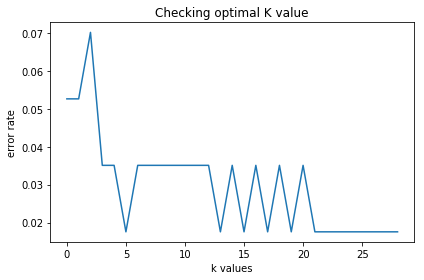

In [121]:
plt.plot(graph)
plt.title("Checking optimal K value")
plt.xlabel('k values')
plt.ylabel('error rate')
plt.tight_layout()

In [122]:
from sklearn.metrics import classification_report,confusion_matrix
matrix = confusion_matrix(y_test,y_predicted)
print(matrix)
print(classification_report(y_test,y_predicted))
samples = 57
acc = (matrix[1][1]+matrix[0][0])/samples*100
error = (matrix[0][1]+matrix[1][0])/samples*100
print('\nKNN Accuracy metrics calculated','\n\nAccuracy of model = ',acc,' %','\nLoss in Classification = ',error,' %')

[[43  0]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        57


KNN Accuracy metrics calculated 

Accuracy of model =  98.24561403508771  % 
Loss in Classification =  1.7543859649122806  %


# Decision Trees

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy').fit(x_train,y_train)
pred = dt.predict(x_test)
matrix = confusion_matrix(y_test,pred)
print(matrix)
print(classification_report(y_test,pred))
samples = 57
acc = (matrix[1][1]+matrix[0][0])/samples*100
error = (matrix[0][1]+matrix[1][0])/samples*100
print('\nDecision Trees Accuracy metrics calculated','\n\nAccuracy of model = ',acc,' %','\nLoss in Classification = ',error,' %')

[[39  4]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.97      0.91      0.94        43
          1       0.76      0.93      0.84        14

avg / total       0.92      0.91      0.91        57


Decision Trees Accuracy metrics calculated 

Accuracy of model =  91.22807017543859  % 
Loss in Classification =  8.771929824561402  %


In [124]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50 , random_state = 5)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [125]:
pred = rf.predict(x_test)

matrix = confusion_matrix(y_test,pred)
print(matrix)
print(classification_report(y_test,pred))
samples = 57
acc = (matrix[1][1]+matrix[0][0])/samples*100
error = (matrix[0][1]+matrix[1][0])/samples*100

[[43  0]
 [ 1 13]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        43
          1       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        57



In [217]:
# data preprocessing for Ensemble
# converting real column of dependent to Integer so can be fitted with classification algorithms 
Y = Y.astype('int')
Y.shape

(569,)

# Ensemble


In [215]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# decision trees bagging
randomstate = 30
kfold = model_selection.KFold(n_splits = 50,random_state=randomstate)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator= cart,n_estimators= num_trees,random_state= randomstate)
results = model_selection.cross_val_score(model,X,Y,cv = kfold)
print(results.mean())
print(results)

0.9689393939393941
[1.         0.91666667 1.         0.83333333 1.         1.
 0.83333333 0.91666667 1.         0.91666667 0.91666667 0.91666667
 0.91666667 0.91666667 1.         1.         1.         1.
 1.         1.         1.         0.90909091 1.         1.
 1.         0.90909091 1.         1.         1.         1.
 1.         0.90909091 1.         0.90909091 1.         0.90909091
 0.90909091 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.90909091
 1.         1.        ]


In [243]:
# bagging NB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
bag = BaggingClassifier(base_estimator = nb)
bag.fit()
print(results.mean())
print(results)

0.9349937343358397
[0.89473684 0.84210526 0.9122807  0.92982456 0.96491228 0.96491228
 0.98245614 0.96491228 0.94736842 0.94642857]


In [287]:
# voting
randomstate = 30
kfold = model_selection.KFold(n_splits = 50,random_state = randomstate)

estimators = []
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
estimators.append(('logistic',model1))
estimators.append(('cart',model2))

voting = VotingClassifier(estimators=estimators)
voting.fit(x_train,y_train)
print(voting)
score = voting.score(x_test,y_test)
print('\nAccuracy =',score)

VotingClassifier(estimators=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('cart',...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

Accuracy = 0.9649122807017544


C:\Users\panne\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
